# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(2360873)
%matplotlib inline



In [2]:
df = pd.read_csv('profissao.csv')

df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


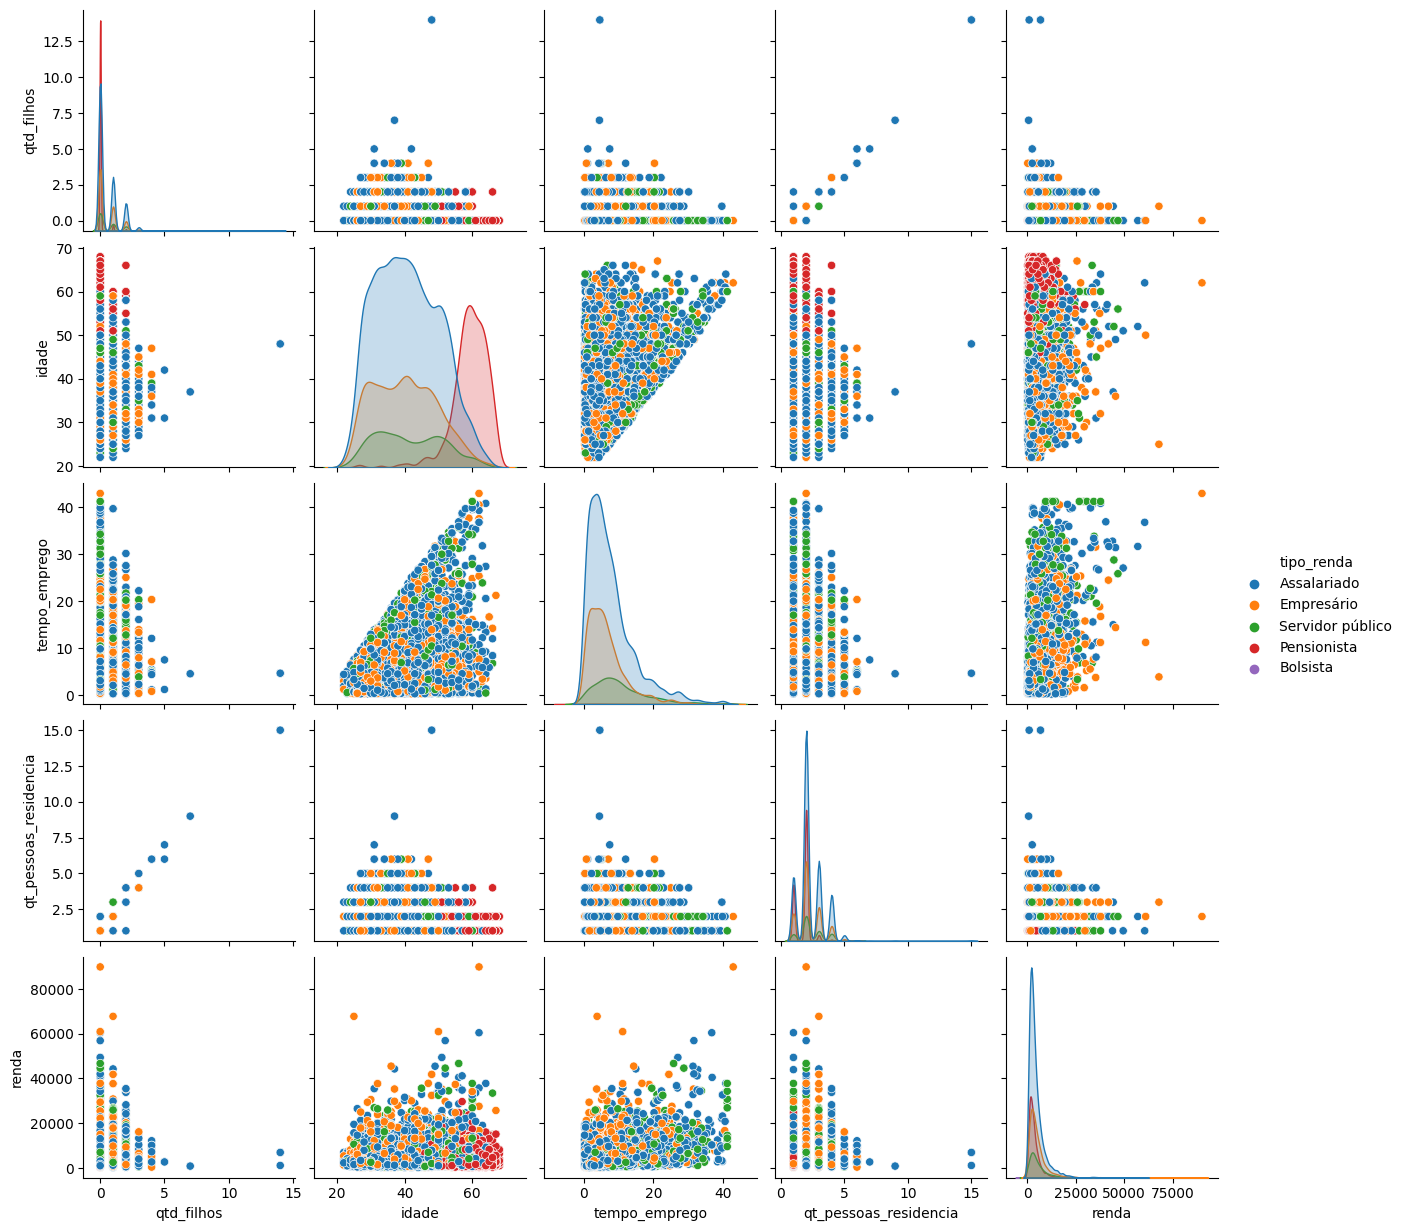

In [3]:
sns.pairplot(df, hue='tipo_renda', vars=['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda'])

<ipython-input-24-5e281ffa3bfc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr(), figsize=(8, 8), center = 0, cmap=cmap)


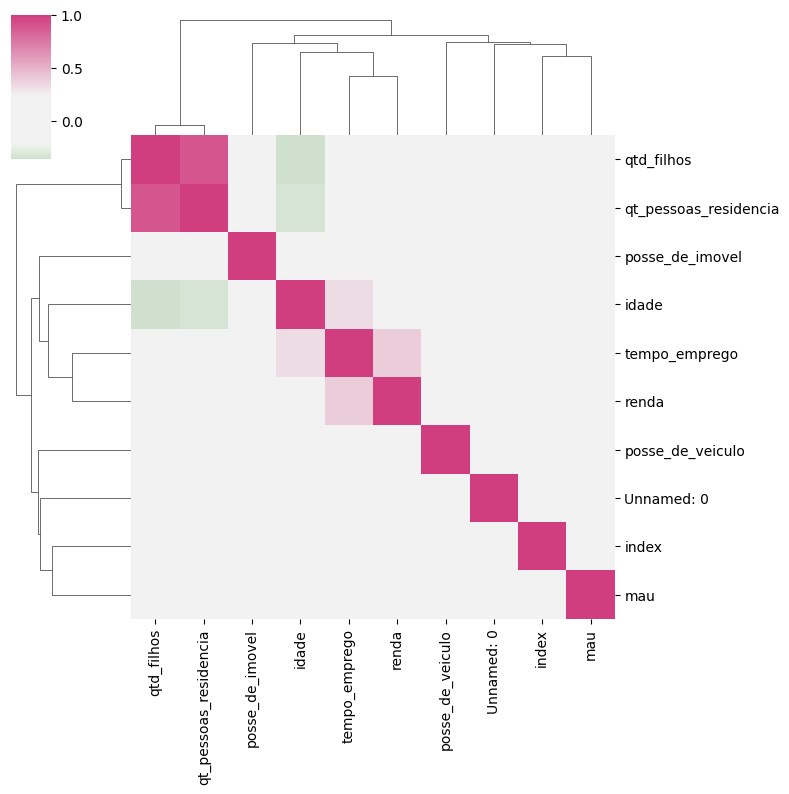

In [24]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(df.corr(), figsize=(8, 8), center = 0, cmap=cmap)

In [5]:
df.corr()

<ipython-input-5-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,index,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
Unnamed: 0,1.000000,-0.001868,0.002567,0.004003,0.015612,-0.004328,-0.002146,0.016628,0.019061,0.007646
index,-0.001868,1.000000,-0.007542,-0.099683,0.039734,-0.047971,-0.034574,0.041818,0.130691,-0.001740
posse_de_veiculo,0.002567,-0.007542,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414
posse_de_imovel,0.004003,-0.099683,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827
qtd_filhos,0.015612,0.039734,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567
idade,-0.004328,-0.047971,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570
tempo_emprego,-0.002146,-0.034574,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235
qt_pessoas_residencia,0.016628,0.041818,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977
mau,0.019061,0.130691,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577
renda,0.007646,-0.001740,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000


Após a análise das matrizes de dispersão e de correlação observei correlações baixas entre praticamente todas as variáveis quantitativas.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

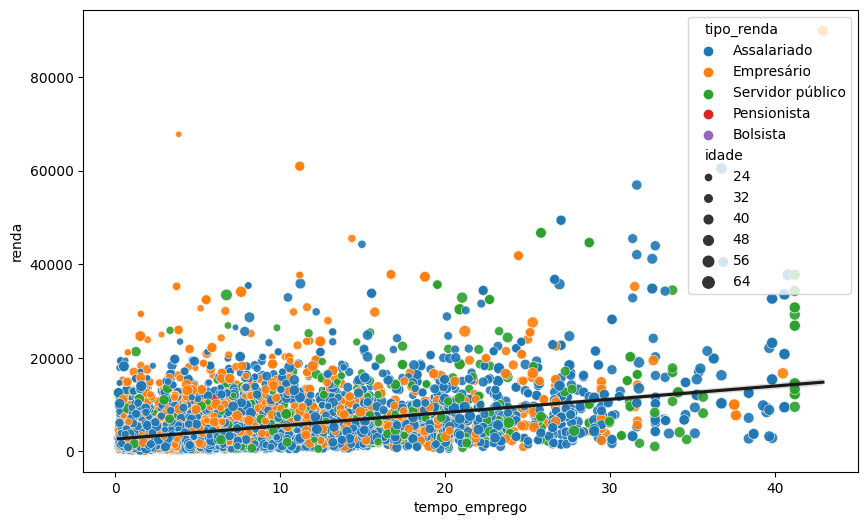

In [17]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='tempo_emprego', y='renda', hue='tipo_renda', size='idade', data=df, alpha=0.9)

sns.regplot(x='tempo_emprego', y='renda', data=df, scatter=False, color='.1')


plt.show()

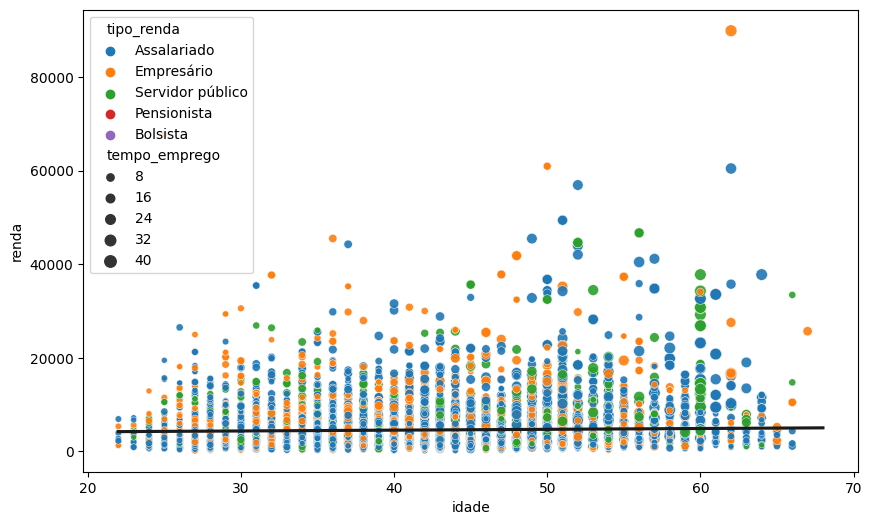

In [18]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='idade', y='renda', hue='tipo_renda', size='tempo_emprego', data=df, alpha=0.9)

sns.regplot(x='idade', y='renda', data=df, scatter=False, color='.1')

plt.show()

Pode-se observar uma covariância significativa e positiva entre a variável renda e tempo_emprego. Ao contrário da relação entre idade e renda que não demonstra tanta variação.

3) Na su aopinião, há outliers na variável renda?

Sim, existem outliers na variável renda, porém estas provavelmente não afetem significativamente os resultados.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [19]:
df_log = df.copy()
df_log['renda'] = np.log(df_log['renda'])



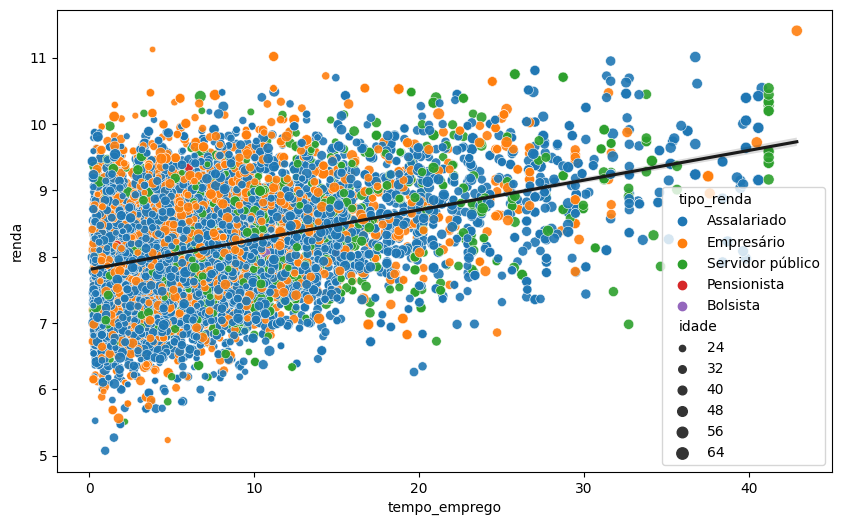

In [22]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='tempo_emprego', y='renda', hue='tipo_renda', size='idade', data=df_log, alpha=0.9)

sns.regplot(x='tempo_emprego', y='renda', data=df_log, scatter=False, color='.1')


plt.show()

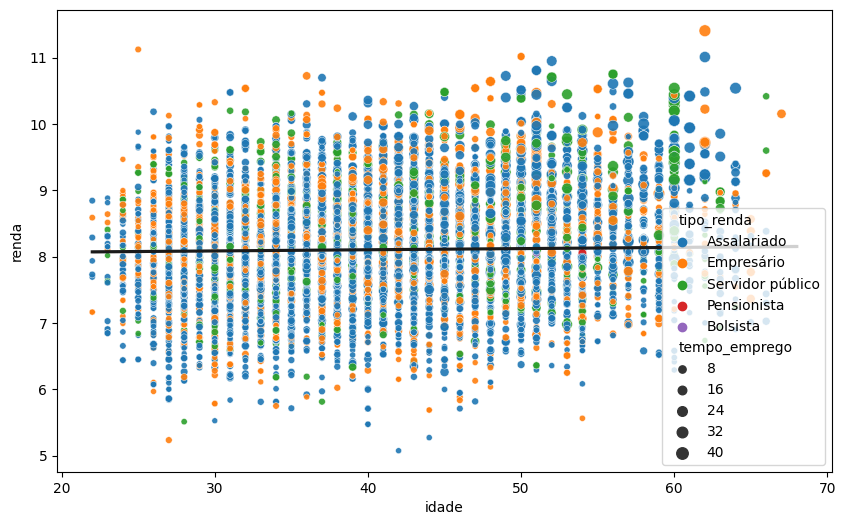

In [23]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='idade', y='renda', hue='tipo_renda', size='tempo_emprego', data=df_log, alpha=0.9)

sns.regplot(x='idade', y='renda', data=df_log, scatter=False, color='.1')

plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Com a aplicação do LOG é fácil perceber o quanto melhorou a análise. Afinal reduziu a dispersão dos pontos e apresenta com mais clareza a inclinação da linha de tendência, em especial na relação entre tempo_empredo e renda.